# Performance Comparison Figures

## Setup and Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline

## Compile Results DataFrame

Manually compile the results DataFrom by copy-paste from evaluation notebook.

In [4]:
# Greedy Results
greedy_results = {
    "BLEU-1": 0.4705,
    "BLEU-2": 0.2836,
    "BLEU-3": 0.1710,
    "BLEU-4": 0.1126,
    "METEOR": 0.2661,
    "BERTScore_P": 0.8854,
    "BERTScore_R": 0.8552,
    "BERTScore_F1": 0.8699
}

# Beam Search Results (k=5)
beam_search_results = {
    "BLEU-1": 0.4712,
    "BLEU-2": 0.2865,
    "BLEU-3": 0.1778,
    "BLEU-4": 0.1199,
    "METEOR": 0.2675,
    "BERTScore_P": 0.8906,
    "BERTScore_R": 0.8552,
    "BERTScore_F1": 0.8725
}

# Random Caption Results
random_results = {
    "BLEU-1": 0.3955,
    "BLEU-2": 0.1748,
    "BLEU-3": 0.0778,
    "BLEU-4": 0.0474,
    "METEOR": 0.2580,
    "BERTScore_P": 0.8735,
    "BERTScore_R": 0.8733,
    "BERTScore_F1": 0.8733
}

# Most Common Caption Results
most_common_results = {
    "BLEU-1": 0.4381,
    "BLEU-2": 0.1852,
    "BLEU-3": 0.0978,
    "BLEU-4": 0.0659,
    "METEOR": 0.2692,
    "BERTScore_P": 0.9002,
    "BERTScore_R": 0.8782,
    "BERTScore_F1": 0.8890
}

# Combine into a dataframe
results_df = pd.DataFrame({
    "Random": random_results,
    "Most Common": most_common_results,
    "Greedy": greedy_results,
    "Beam Search": beam_search_results,
})

# 
subset_metrics = ["BLEU-1", "BLEU-4", "METEOR", "BERTScore_F1"]
subset_results_df = results_df.loc[subset_metrics, :]

results_df

,Random,Most Common,Greedy,Beam Search
BLEU-1,0.3955,0.4381,0.4705,0.4712
BLEU-2,0.1748,0.1852,0.2836,0.2865
BLEU-3,0.0778,0.0978,0.1710,0.1778
BLEU-4,0.0474,0.0659,0.1126,0.1199
METEOR,0.2580,0.2692,0.2661,0.2675
BERTScore_P,0.8735,0.9002,0.8854,0.8906
BERTScore_R,0.8733,0.8782,0.8552,0.8552
BERTScore_F1,0.8733,0.8890,0.8699,0.8725


## Bar Chart Comparison

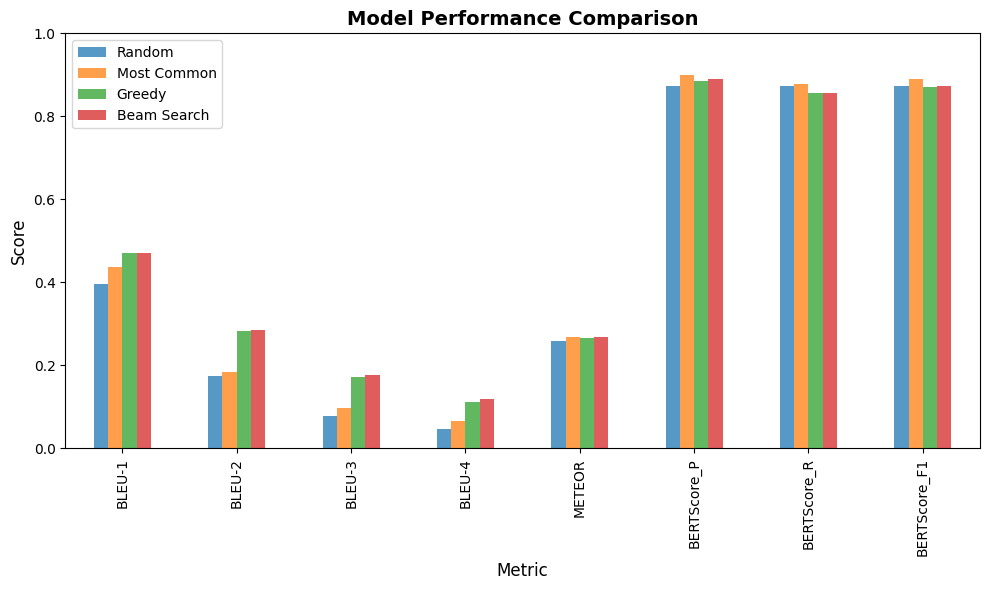

In [5]:
# All Metrics
fig, ax = plt.subplots(figsize=(10, 6))
results_df.plot(kind="bar", alpha=0.75, ax=ax)
ax.set_ylim(0, 1)
ax.set_ylabel("Score", fontsize=12)
ax.set_xlabel("Metric", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=14, fontweight="bold")
ax.legend(loc="upper left")

fig.tight_layout()
fig.savefig("../figures/evaluation_model_performance_comparison_bar_chart.png")

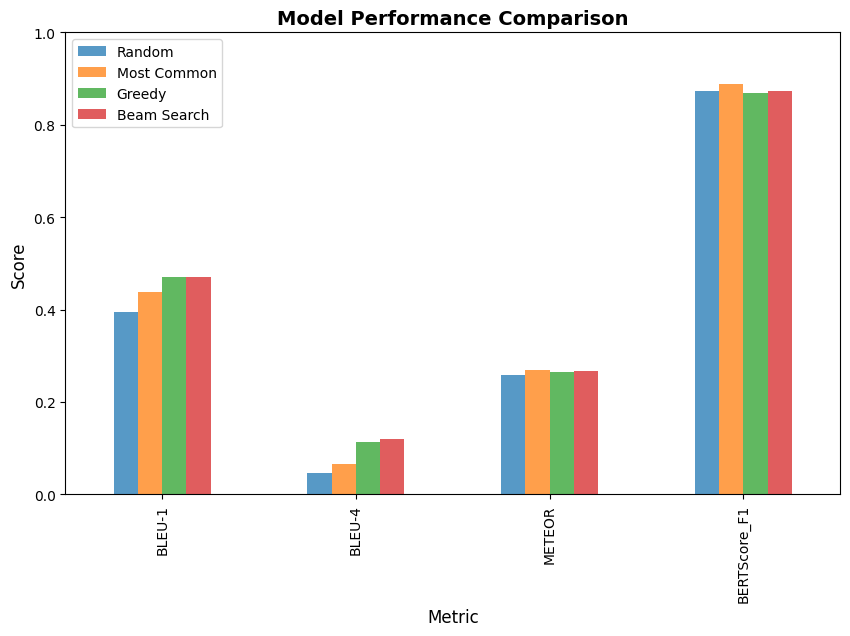

In [6]:
# Subset of Metrics
fig, ax = plt.subplots(figsize=(10, 6))
subset_results_df.plot(kind="bar", alpha=0.75, ax=ax)
ax.set_ylim(0, 1)
ax.set_ylabel("Score", fontsize=12)
ax.set_xlabel("Metric", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=14, fontweight="bold")
ax.legend(loc="upper left")

## Radar Chart Comparison

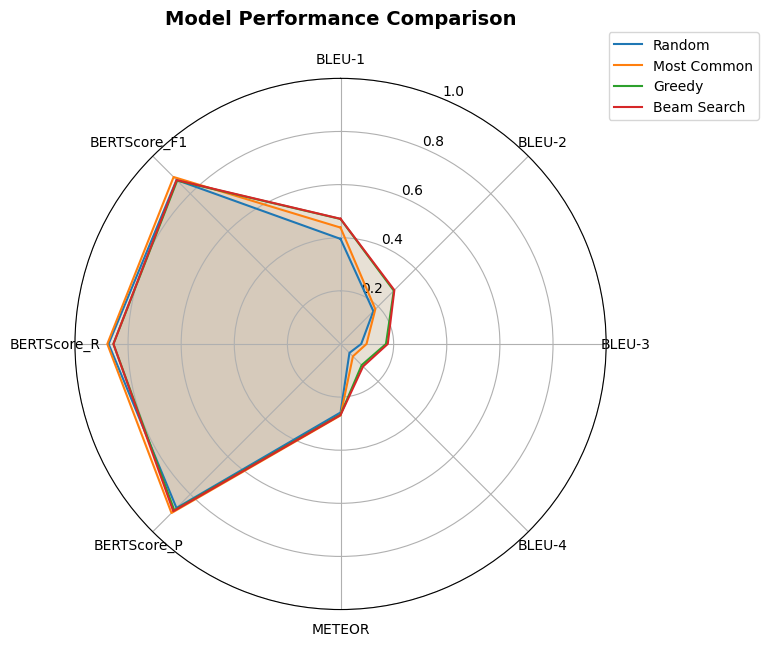

In [7]:
# Setup the metrics and angles
metrics = results_df.index.tolist()
num_metrics = len(metrics)
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
angles += angles[:1]  # close the loop

# Prepare values for each model
models = results_df.columns.tolist()
values = {}
for model in models:
    val = results_df[model].tolist()
    val += val[:1]  # close the loop
    values[model] = val

# Generate the plot and add axes annotations
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for model in models:
    ax.plot(angles, values[model], label=model)
    ax.fill(angles, values[model], alpha=0.1)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
ax.set_title("Model Performance Comparison", fontsize=14, fontweight="bold", pad=20)
ax.set_ylim(0, 1.0)
ax.grid(True)
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

fig.tight_layout()
fig.savefig("../figures/evaluation_model_performance_comparison_radar_chart.png")

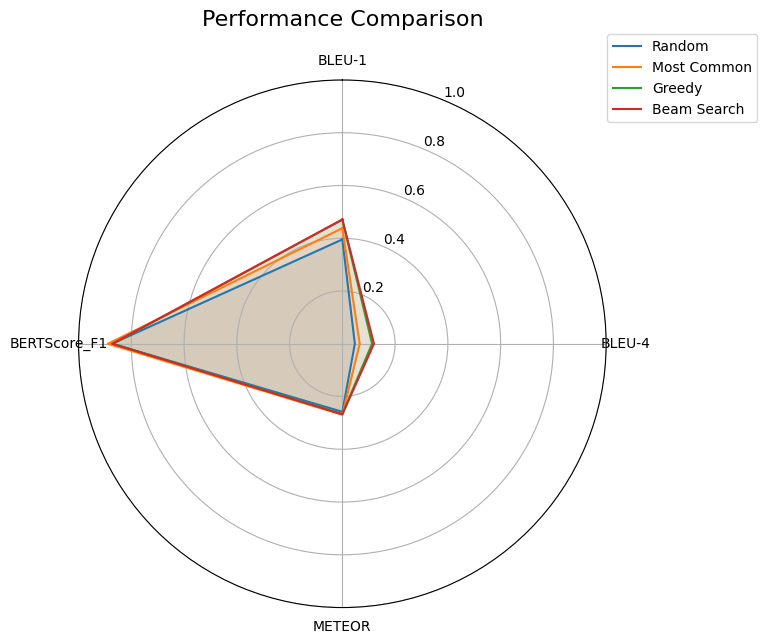

In [8]:
labels = subset_results_df.index.tolist()
num_metrics = len(labels)
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
angles += angles[:1]  # close the radar chart

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each strategy
for strategy in subset_results_df.columns:
    values = subset_results_df[strategy].tolist()
    values += values[:1]  # close the plot
    ax.plot(angles, values, label=strategy)
    ax.fill(angles, values, alpha=0.1)

# Customization
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_ylim(0, 1)
ax.set_title("Performance Comparison", size=16, pad=20)
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()